# Tutorial 2: Explore and clean data using notebook

Applying tutorial:
[https://learn.microsoft.com/en-us/fabric/data-science/tutorial-data-science-introduction](http://)

In [96]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import seaborn as sns
sns.set_theme(style="whitegrid", palette="tab10", rc = {'figure.figsize':(9,6)})
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import rc, rcParams
import numpy as np
import pandas as pd
import itertools

/kaggle/input/global-youtube-statistics-2023/Global YouTube Statistics.csv


In [97]:
df = pd.read_csv('/kaggle/input/global-youtube-statistics-2023/Global YouTube Statistics.csv', encoding='latin1')
df.head(10)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
5,6,Music,119000000,0.000000e+00,NaN,Music,0,NaN,NaN,Music,...,NaN,2013.0,Sep,24.0,NaN,NaN,NaN,NaN,NaN,NaN
6,7,ýýý Kids Diana Show,112000000,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,...,NaN,2015.0,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
7,8,PewDiePie,111000000,2.905804e+10,Gaming,PewDiePie,4716,Japan,JP,Entertainment,...,NaN,2010.0,Apr,29.0,63.2,1.262266e+08,2.29,115782416.0,36.204824,138.252924
8,9,Like Nastya,106000000,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,...,100000.0,2016.0,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756
9,10,Vlad and Niki,98900000,7.718017e+10,Entertainment,Vlad and Niki,574,United States,US,Entertainment,...,600000.0,2018.0,Apr,23.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


## Drop missing values

In [98]:
print(df.isnull().sum())

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

In [99]:
df= df.dropna()

In [100]:
df.isnull().sum()

rank                                       0
Youtuber                                   0
subscribers                                0
video views                                0
category                                   0
Title                                      0
uploads                                    0
Country                                    0
Abbreviation                               0
channel_type                               0
video_views_rank                           0
country_rank                               0
channel_type_rank                          0
video_views_for_the_last_30_days           0
lowest_monthly_earnings                    0
highest_monthly_earnings                   0
lowest_yearly_earnings                     0
highest_yearly_earnings                    0
subscribers_for_last_30_days               0
created_year                               0
created_month                              0
created_date                               0
Gross tert

## Drop Duplicates

In [101]:
df = df.drop_duplicates()

## Pre-processing columns

In [102]:
df.shape

(554, 28)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 554 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     554 non-null    int64  
 1   Youtuber                                 554 non-null    object 
 2   subscribers                              554 non-null    int64  
 3   video views                              554 non-null    float64
 4   category                                 554 non-null    object 
 5   Title                                    554 non-null    object 
 6   uploads                                  554 non-null    int64  
 7   Country                                  554 non-null    object 
 8   Abbreviation                             554 non-null    object 
 9   channel_type                             554 non-null    object 
 10  video_views_rank                         554 non-null  

In [104]:
df.head(5)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
8,9,Like Nastya,106000000,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,...,100000.0,2016.0,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756


In [105]:
df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [106]:
# Creating new columns
df['yearly_earnings'] = (df['lowest_monthly_earnings'] + df['highest_monthly_earnings']) // 2  

In [107]:
df = df.drop(columns=['Abbreviation',
                      "video_views_for_the_last_30_days",
                      "subscribers_for_last_30_days",
                      'created_month',   
                      'created_date',
                      "Gross tertiary education enrollment (%)",
                      'Population',
                      'Unemployment rate',
                      'Urban_population',
                      'Latitude',
                      'Longitude','highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings'])

In [108]:
df.shape

(554, 15)

In [109]:
df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'channel_type', 'video_views_rank',
       'country_rank', 'channel_type_rank', 'lowest_monthly_earnings',
       'created_year', 'yearly_earnings'],
      dtype='object')

In [110]:
print(df['channel_type'].unique())     
print('\n\n')
print(df['category'].unique())

['Music' 'Entertainment' 'Education' 'People' 'Sports' 'Film' 'News'
 'Games' 'Howto' 'Comedy' 'Nonprofit' 'Tech' 'Animals' 'Autos']



['Music' 'Entertainment' 'Education' 'Shows' 'People & Blogs' 'Sports'
 'Film & Animation' 'News & Politics' 'Gaming' 'Trailers' 'Comedy'
 'Nonprofits & Activism' 'Science & Technology' 'Movies' 'Howto & Style'
 'Pets & Animals' 'Autos & Vehicles']


In [111]:
df.drop('category' , axis = 1 , inplace = True)

In [112]:
df.shape

(554, 14)

In [113]:
df.head(1)

,rank,Youtuber,subscribers,video views,Title,uploads,Country,channel_type,video_views_rank,country_rank,channel_type_rank,lowest_monthly_earnings,created_year,yearly_earnings
0,1,T-Series,245000000,2.280000e+11,T-Series,20082,India,Music,1.0,1.0,1.0,564600.0,2006.0,4782300.0


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 554 entries, 0 to 994
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     554 non-null    int64  
 1   Youtuber                 554 non-null    object 
 2   subscribers              554 non-null    int64  
 3   video views              554 non-null    float64
 4   Title                    554 non-null    object 
 5   uploads                  554 non-null    int64  
 6   Country                  554 non-null    object 
 7   channel_type             554 non-null    object 
 8   video_views_rank         554 non-null    float64
 9   country_rank             554 non-null    float64
 10  channel_type_rank        554 non-null    float64
 11  lowest_monthly_earnings  554 non-null    float64
 12  created_year             554 non-null    float64
 13  yearly_earnings          554 non-null    float64
dtypes: float64(7), int64(3), object

## Exploring the data

In [115]:
df.head(1)

,rank,Youtuber,subscribers,video views,Title,uploads,Country,channel_type,video_views_rank,country_rank,channel_type_rank,lowest_monthly_earnings,created_year,yearly_earnings
0,1,T-Series,245000000,2.280000e+11,T-Series,20082,India,Music,1.0,1.0,1.0,564600.0,2006.0,4782300.0


### Determine categorical, numerical, and target attributes
Use this code to determine categorical, numerical, and target attributes.

#### For Regression (Numerical Target)

In [116]:
# Determine the dependent (target) attribute
dependent_variable_name = "video views"
print(f"Dependent (target) attribute: {dependent_variable_name}")

# Determine the categorical attributes
categorical_variables = [col for col in df.columns if df[col].dtype == "object"
                        or df[col].nunique() <= 5 and col != dependent_variable_name]
print(f"Categorical attributes: {categorical_variables}")

# Determine the numerical attributes
numeric_variables = [col for col in df.columns if df[col].dtype != "object"
                        and df[col].nunique() > 5 and col != dependent_variable_name]
print(f"Numerical attributes: {numeric_variables}")

Dependent (target) attribute: video views
Categorical attributes: ['Youtuber', 'Title', 'Country', 'channel_type']
Numerical attributes: ['rank', 'subscribers', 'uploads', 'video_views_rank', 'country_rank', 'channel_type_rank', 'lowest_monthly_earnings', 'created_year', 'yearly_earnings']


#### For Classification (Categorical Target)

In [117]:
# Determine the target attribute
dependent_variable_name = "channel_type"
print("Target Attribute:", dependent_variable_name)

# Determine the categorical attributes
categorical_variables = [col for col in df.columns if (df[col].dtype == "object"
                        or df[col].nunique() <= 5)
                        and col != dependent_variable_name]
print("Categorical Attributes:", categorical_variables)

# Determine the numerical attributes
numeric_variables = [col for col in df.columns if df[col].dtype != "object"
                        and df[col].nunique() > 5
                        and col != dependent_variable_name]
print("Numerical Attributes:", numeric_variables)

Target Attribute: channel_type
Categorical Attributes: ['Youtuber', 'Title', 'Country']
Numerical Attributes: ['rank', 'subscribers', 'video views', 'uploads', 'video_views_rank', 'country_rank', 'channel_type_rank', 'lowest_monthly_earnings', 'created_year', 'yearly_earnings']


#### The five-number summary
Show the five-number summary (the minimum score, first quartile, median, third quartile, the maximum score) for the numerical attributes, using box plots.

/tmp/ipykernel_34/1463454572.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


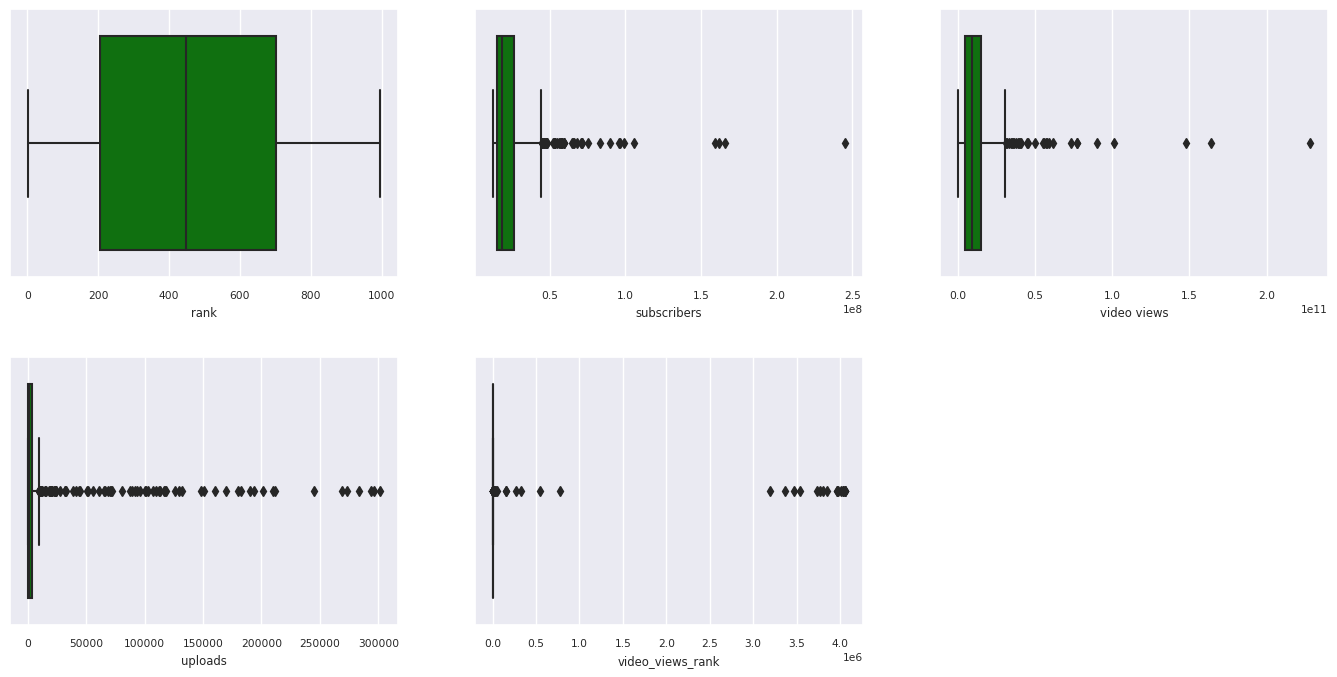

In [118]:
# The five-number summary
df_num_cols = df[numeric_variables]
sns.set(font_scale=0.7) 
fig, axes = plt.subplots(nrows=2, ncols=3, gridspec_kw=dict(hspace=0.3), figsize=(17, 8))
fig.tight_layout()
for ax, col in zip(axes.flatten(), df_num_cols.columns):
    sns.boxplot(x=df_num_cols[col], color='green', ax=ax)
fig.delaxes(axes[1, 2])
plt.show()

### Distribution of target attribute across categorical and numerical attributes

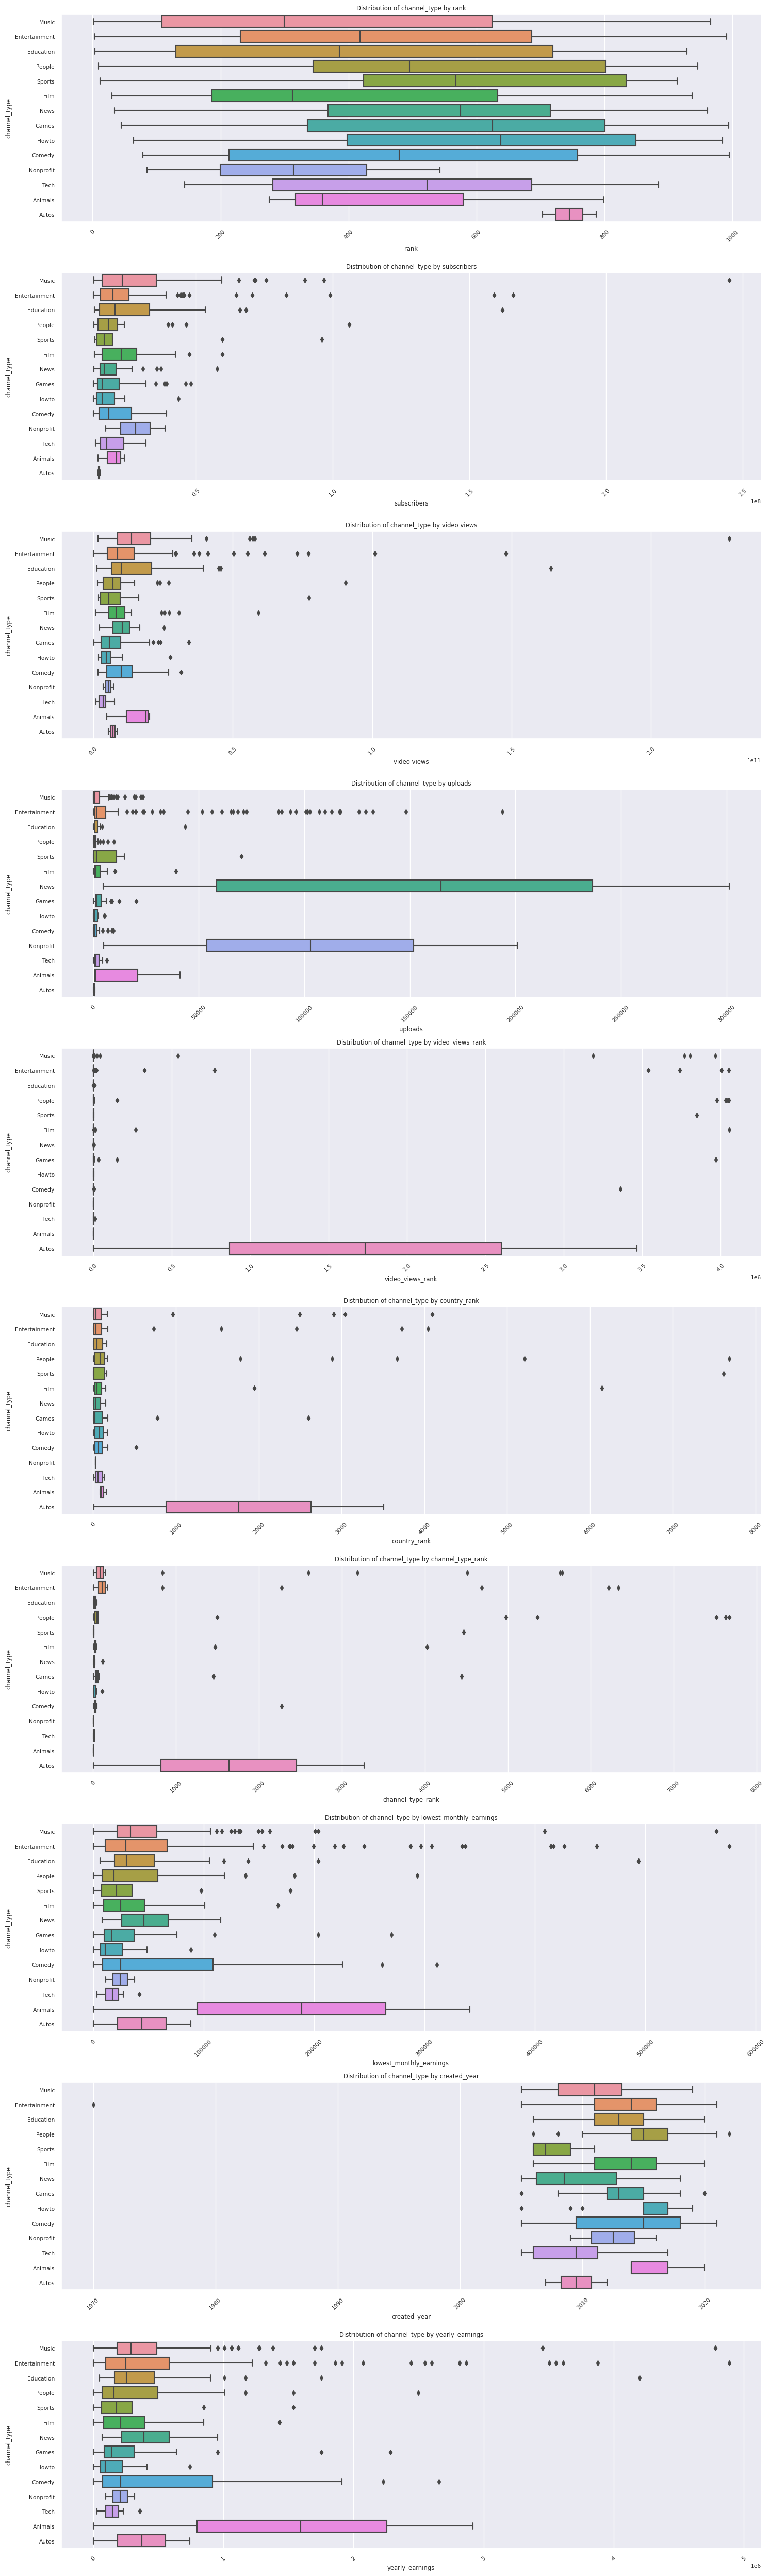

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plots for numerical attributes against the target attribute
fig, axes = plt.subplots(len(numeric_variables), 1, figsize=(15, 5 * len(numeric_variables)))

for i, attribute in enumerate(numeric_variables):
    sns.boxplot(x=attribute, y=dependent_variable_name, data=df, ax=axes[i] if len(numeric_variables) > 1 else axes)
    axes[i].set_title(f'Distribution of {dependent_variable_name} by {attribute}')
    axes[i].set_xlabel(attribute)
    axes[i].set_ylabel(dependent_variable_name)
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

#### Dist numerical attributes
Show the frequency distribution of numerical attributes using histogram.

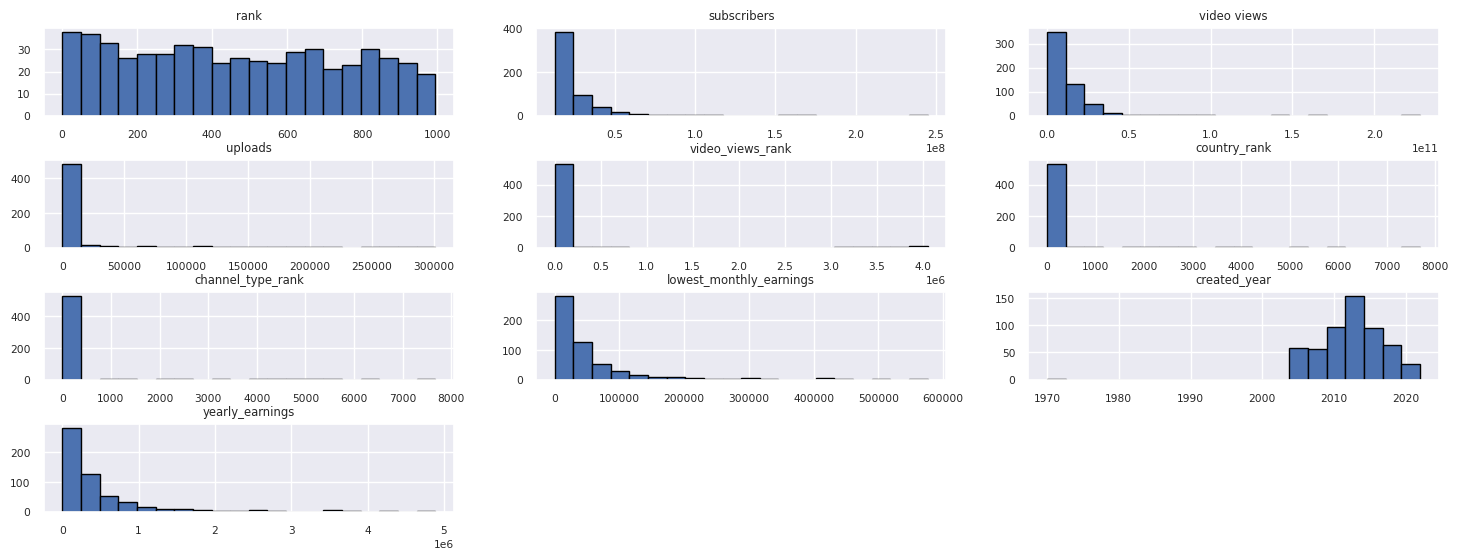

In [120]:
columns = df_num_cols.columns[: len(df_num_cols.columns)]
fig = plt.figure()
fig.set_size_inches(18, 8)
length = len(columns)
for i,j in itertools.zip_longest(columns, range(length)):
    plt.subplot((length // 2), 3, j+1)
    plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
    df_num_cols[i].hist(bins = 20, edgecolor = 'black')
    plt.title(i)
plt.show()

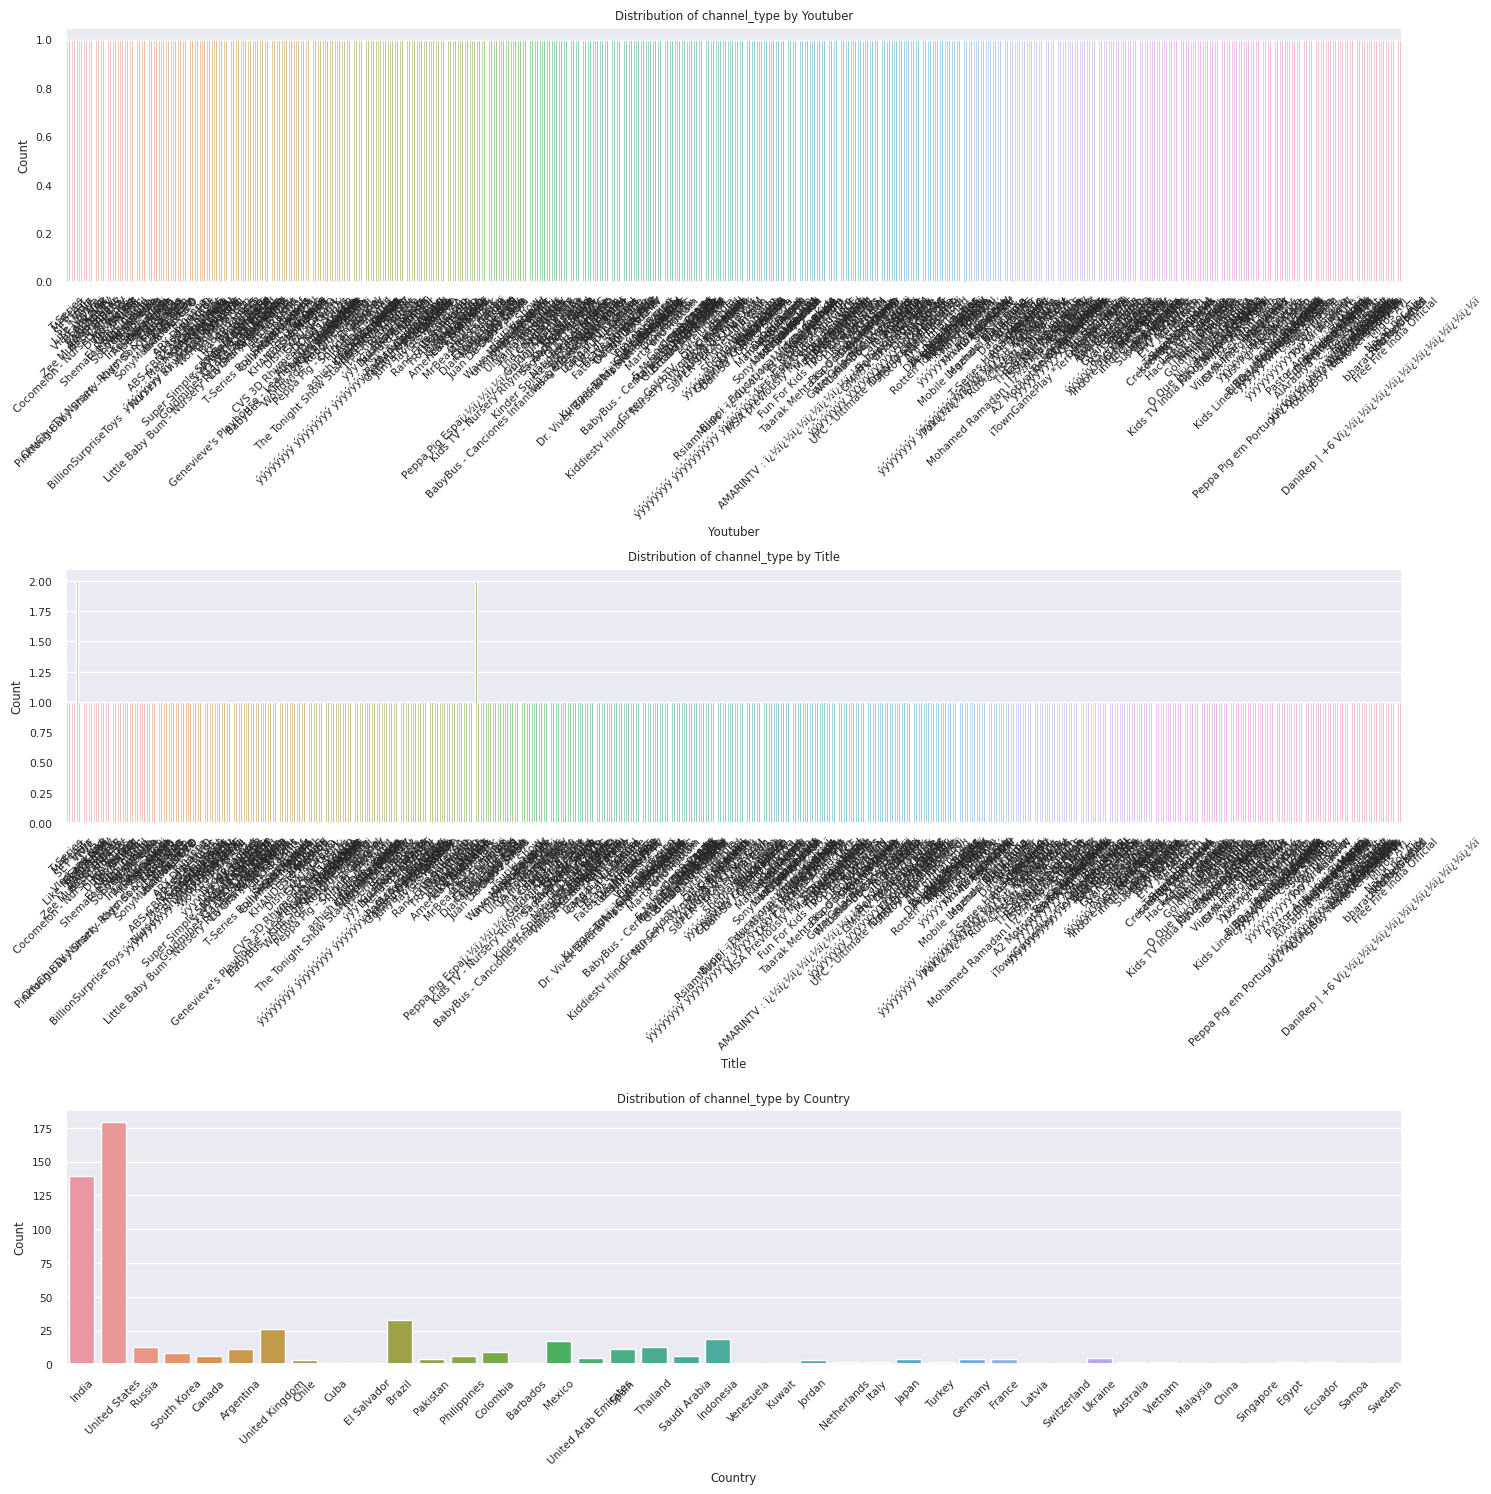

In [121]:
# Count plots for categorical attributes
fig, axes = plt.subplots(len(categorical_variables), 1, figsize=(15, 5 * len(categorical_variables)))

for i, attribute in enumerate(categorical_variables):
    sns.countplot(x=attribute, data=df, ax=axes[i] if len(categorical_variables) > 1 else axes)
    axes[i].set_title(f'Distribution of {dependent_variable_name} by {attribute}')
    axes[i].set_xlabel(attribute)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

* United states has the most channel_types then India

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


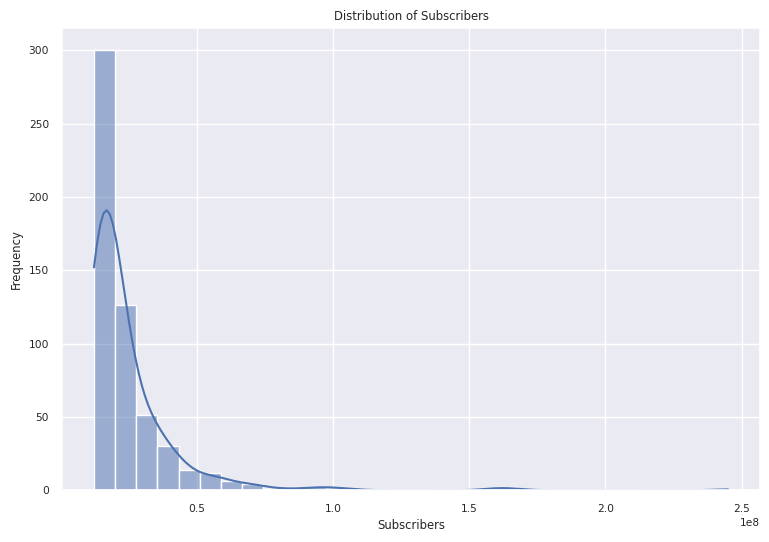

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Subscribers
sns.histplot(data=df, x='subscribers', bins=30, kde=True)
plt.title('Distribution of Subscribers')
plt.xlabel('Subscribers')
plt.ylabel('Frequency')
plt.show()


### Visualization between the target attribute and other features

/tmp/ipykernel_34/1450489870.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='channel_type', y='subscribers', ci=None)


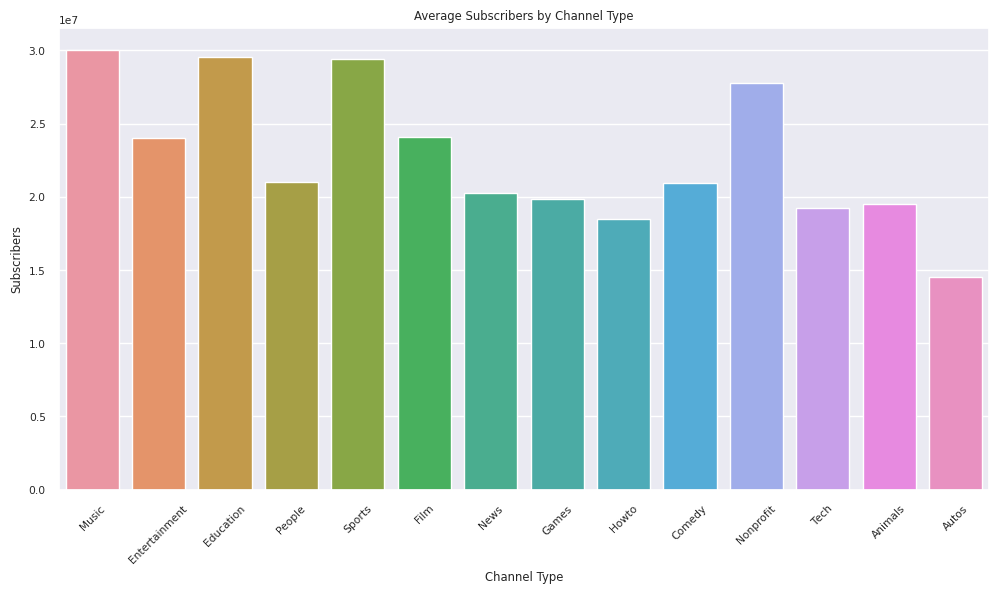

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for Channel Type vs. Subscribers
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='channel_type', y='subscribers', ci=None)
plt.title('Average Subscribers by Channel Type')
plt.xlabel('Channel Type')
plt.ylabel('Subscribers')
plt.xticks(rotation=45)
plt.show()

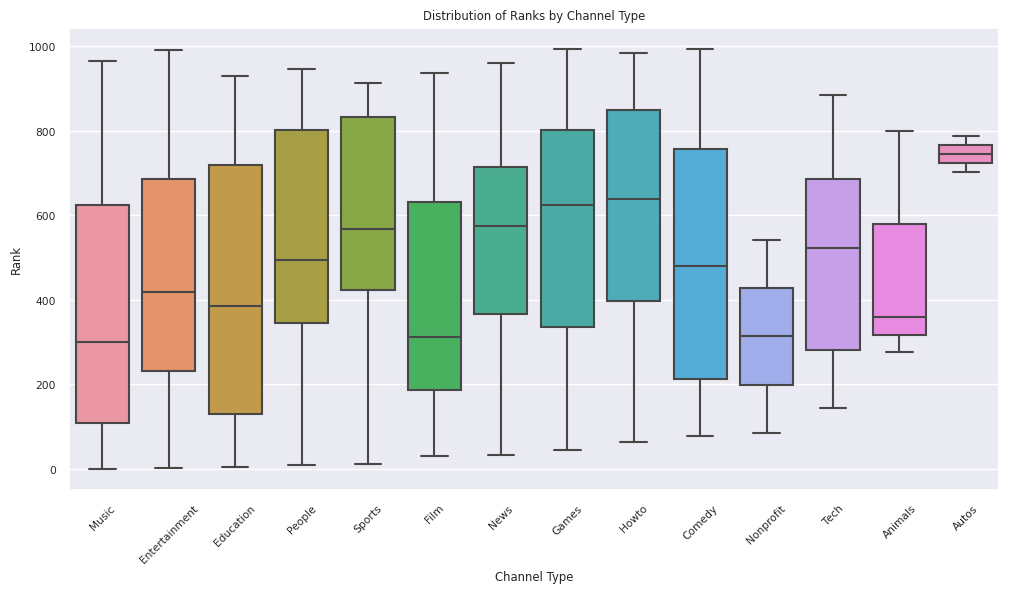

In [135]:
# Box plot for Channel Type vs. Rank
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='channel_type', y='rank')
plt.title('Distribution of Ranks by Channel Type')
plt.xlabel('Channel Type')
plt.ylabel('Rank')
plt.xticks(rotation=45)
plt.show()

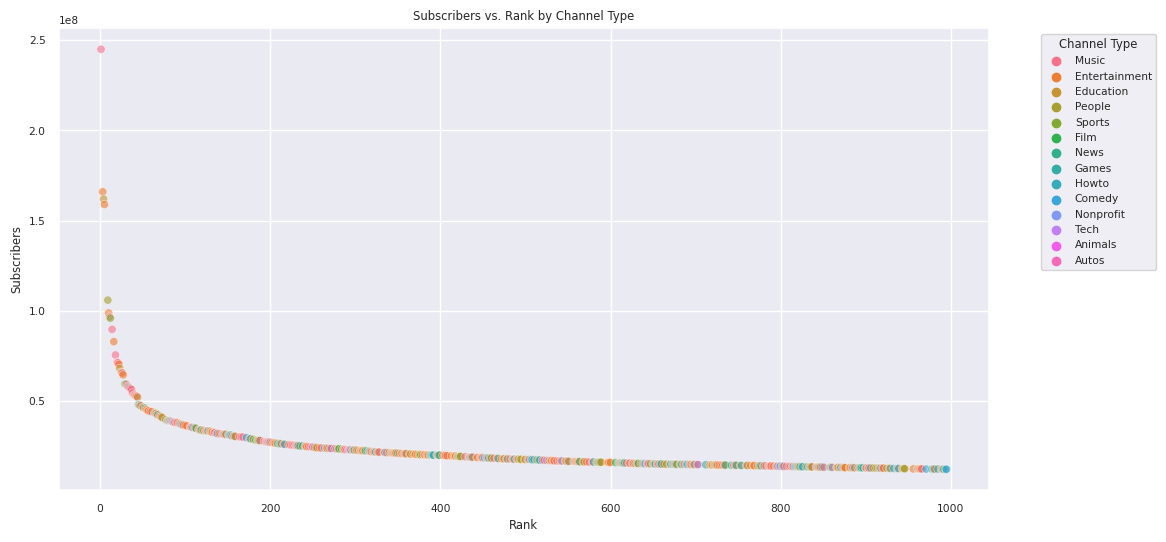

In [136]:
# Scatter plot for Channel Type vs. Subscribers and Rank
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='rank', y='subscribers', hue='channel_type', alpha=0.6)
plt.title('Subscribers vs. Rank by Channel Type')
plt.xlabel('Rank')
plt.ylabel('Subscribers')
plt.legend(title='Channel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


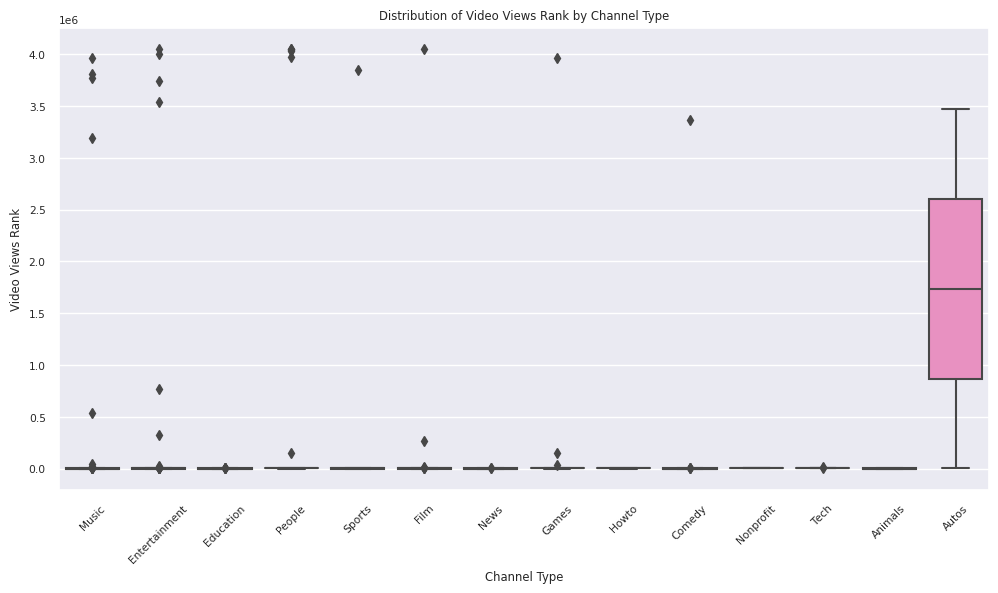

In [137]:
# Box plot for Channel Type vs. Video Views Rank
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='channel_type', y='video_views_rank')
plt.title('Distribution of Video Views Rank by Channel Type')
plt.xlabel('Channel Type')
plt.ylabel('Video Views Rank')
plt.xticks(rotation=45)
plt.show()


/tmp/ipykernel_34/361959220.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='channel_type', y='yearly_earnings', ci=None)


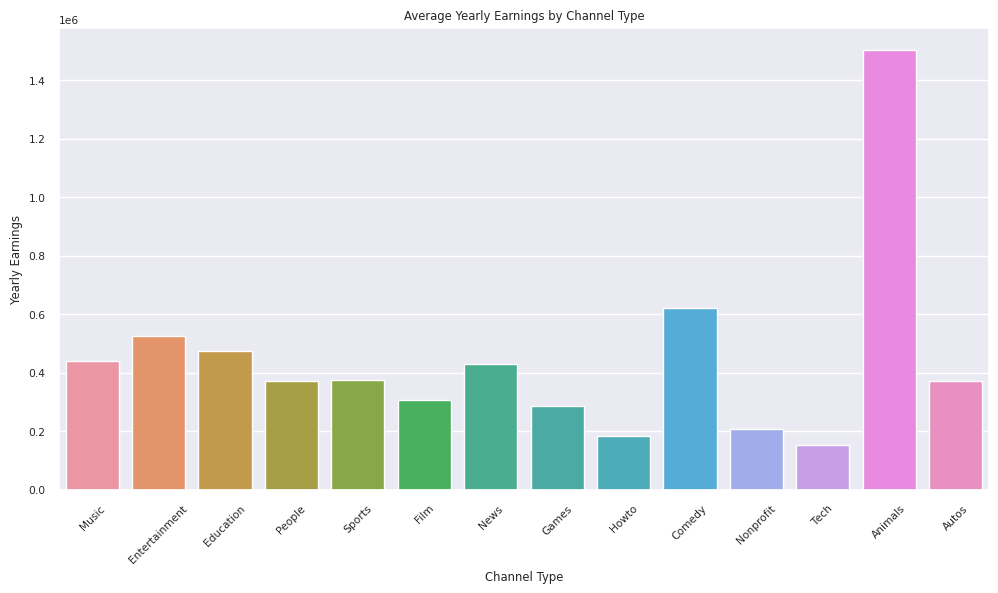

In [138]:
# Bar plot for Channel Type vs. Yearly Earnings
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='channel_type', y='yearly_earnings', ci=None)
plt.title('Average Yearly Earnings by Channel Type')
plt.xlabel('Channel Type')
plt.ylabel('Yearly Earnings')
plt.xticks(rotation=45)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

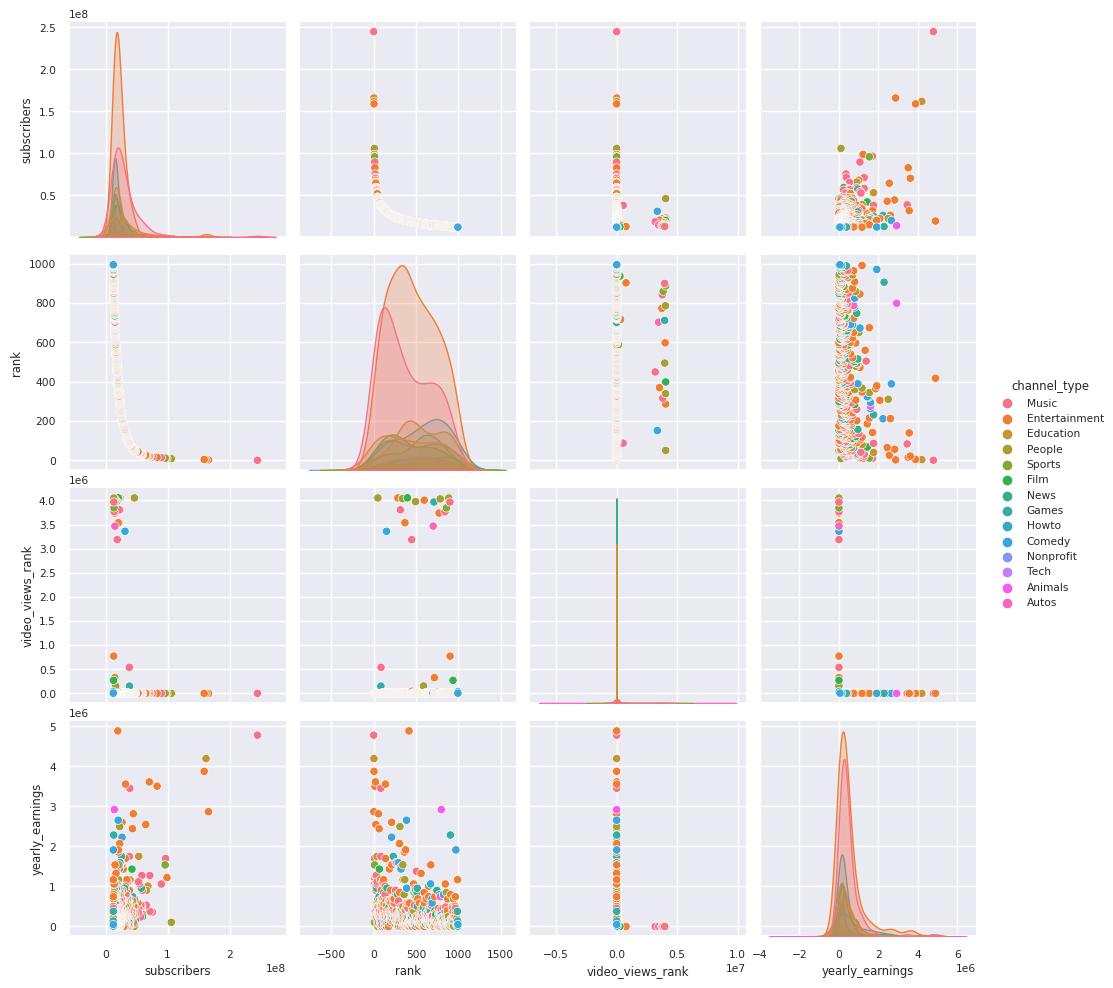

In [139]:
# Pair plot for Channel Type with multiple features
sns.pairplot(df, hue='channel_type', vars=['subscribers', 'rank', 'video_views_rank', 'yearly_earnings'])
plt.show()

### Perform feature engineering
Perform feature engineering to generate new attributes based on current attributes

##### New features:
1. Upload Rate: Number of uploads divided by the number of years the channel has been active.
2. Rank Ratios: Ratio of different types of ranks (e.g., video_views_rank to channel_type_rank).
3. Income per View: Estimated earnings divided by video views.

In [122]:
# Create new features
df['years_active'] = 2024 - df['created_year']
df['upload_rate'] = df['uploads'] / df['years_active']
df['rank_ratio'] = df['video_views_rank'] / df['channel_type_rank']
df['income_per_view'] = df['yearly_earnings'] / df['video views']

# Display the new features
print(df[['upload_rate', 'rank_ratio', 'income_per_view']])

     upload_rate  rank_ratio  income_per_view
0    1115.666667    1.000000         0.000021
2      61.750000   48.000000         0.000101
3      53.666667    2.000000         0.000026
4    6474.222222    1.500000         0.000026
8      61.625000   25.200000         0.000001
..           ...         ...              ...
989     8.250000    4.871345         0.000015
990   171.428571    3.052326         0.000129
991   250.000000   89.000000         0.000082
993     3.250000  508.869565         0.000022
994     8.857143  103.818182         0.000024

[554 rows x 3 columns]


#### Visualization again

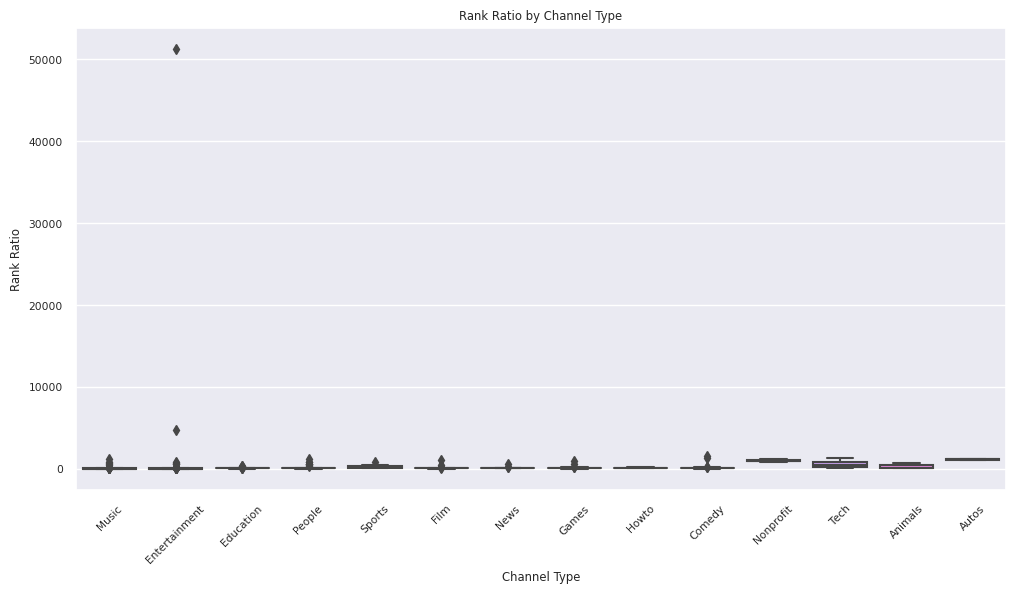

In [140]:
# Distribution of Rank Ratio by Channel Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='channel_type', y='rank_ratio')
plt.title('Rank Ratio by Channel Type')
plt.xlabel('Channel Type')
plt.ylabel('Rank Ratio')
plt.xticks(rotation=45)
plt.show()

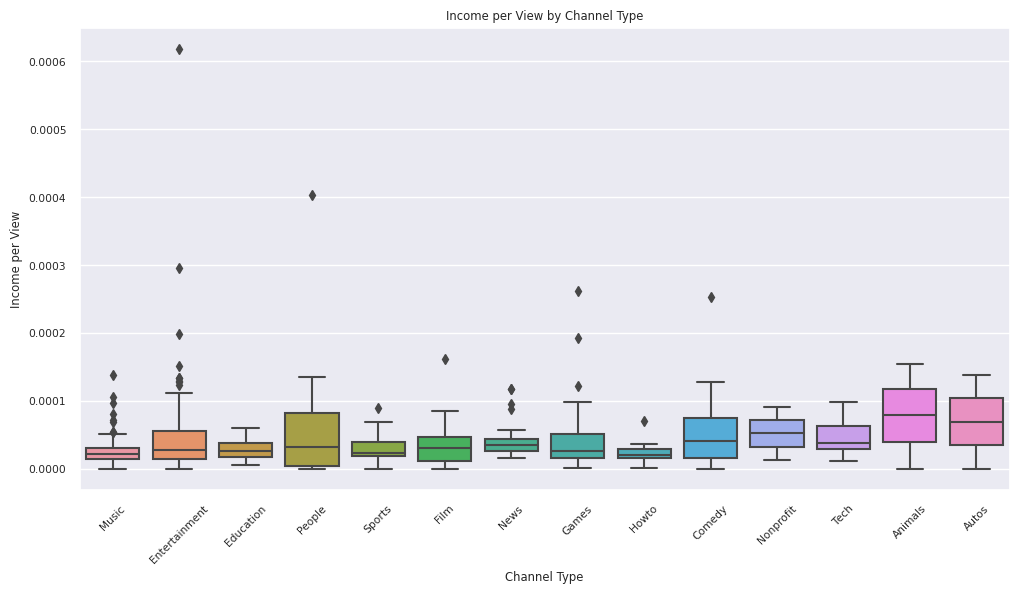

In [141]:
# Distribution of Income per View by Channel Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='channel_type', y='income_per_view')
plt.title('Income per View by Channel Type')
plt.xlabel('Channel Type')
plt.ylabel('Income per View')
plt.xticks(rotation=45)
plt.show()


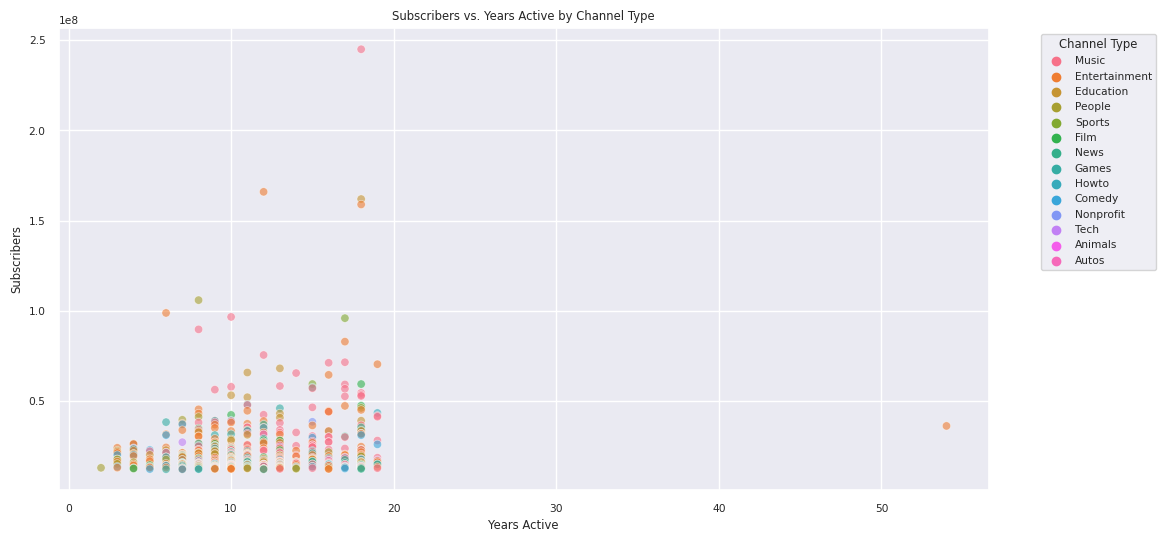

In [142]:
# Scatter plot for Years Active vs. Subscribers
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='years_active', y='subscribers', hue='channel_type', alpha=0.6)
plt.title('Subscribers vs. Years Active by Channel Type')
plt.xlabel('Years Active')
plt.ylabel('Subscribers')
plt.legend(title='Channel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

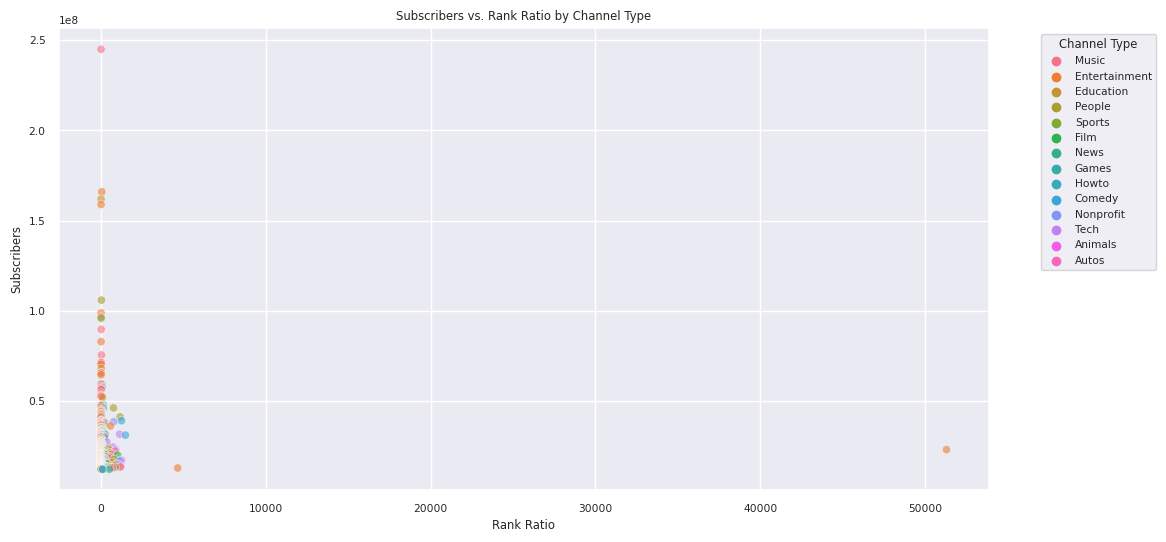

In [143]:
# Scatter plot for Rank Ratio vs. Subscribers
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='rank_ratio', y='subscribers', hue='channel_type', alpha=0.6)
plt.title('Subscribers vs. Rank Ratio by Channel Type')
plt.xlabel('Rank Ratio')
plt.ylabel('Subscribers')
plt.legend(title='Channel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

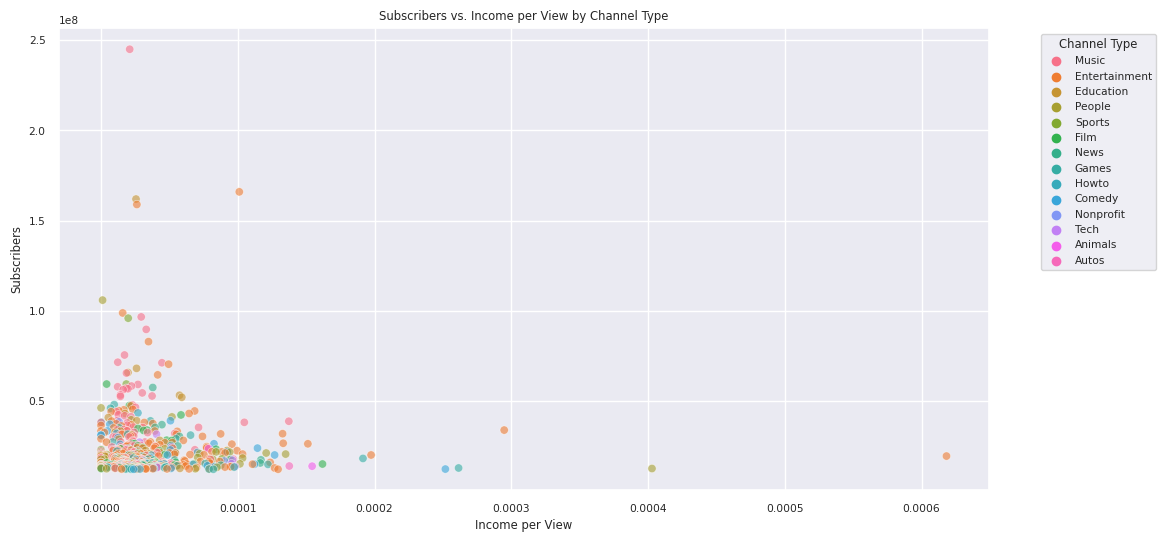

In [144]:
# Scatter plot for Income per View vs. Subscribers
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='income_per_view', y='subscribers', hue='channel_type', alpha=0.6)
plt.title('Subscribers vs. Income per View by Channel Type')
plt.xlabel('Income per View')
plt.ylabel('Subscribers')
plt.legend(title='Channel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

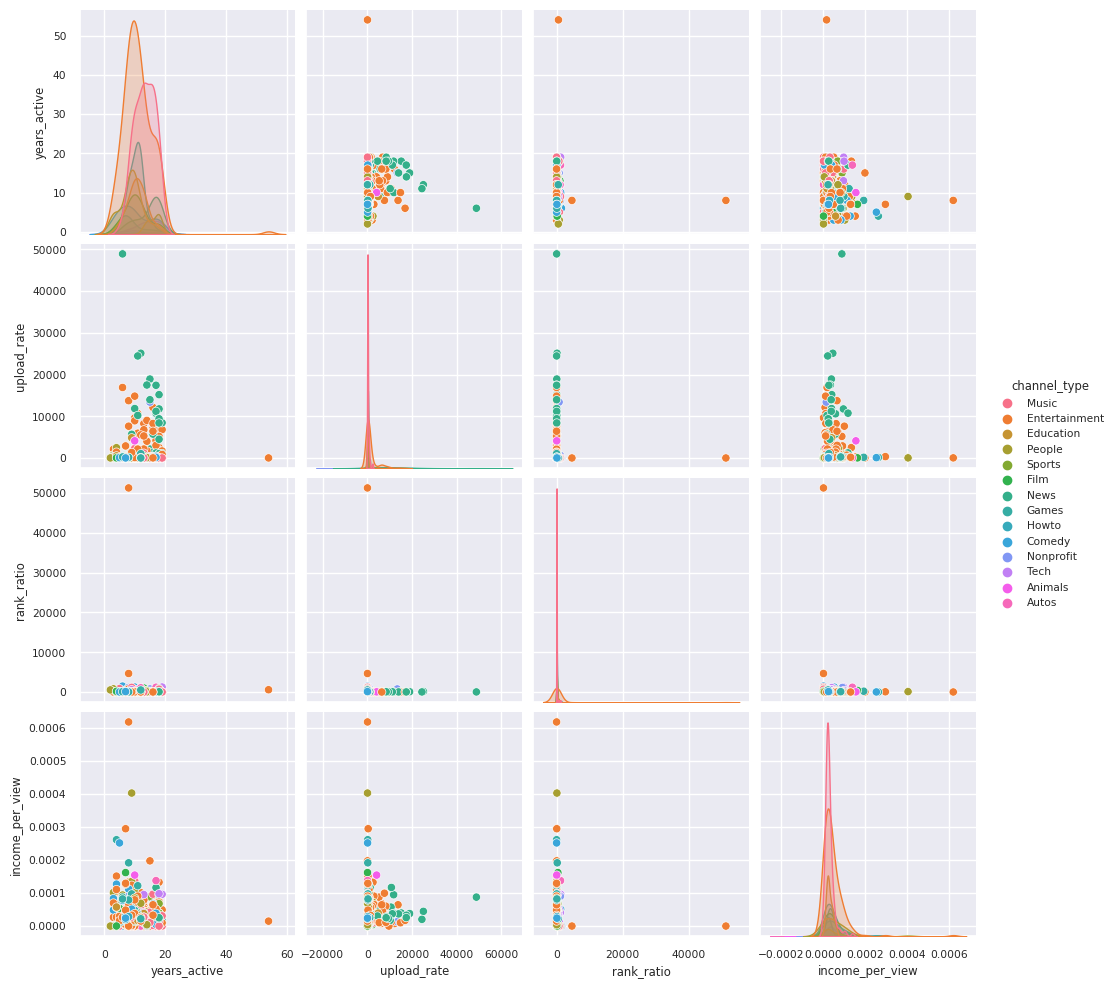

In [145]:
# Pair plot for new features by Channel Type
sns.pairplot(df, hue='channel_type', vars=['years_active', 'upload_rate', 'rank_ratio', 'income_per_view'])
plt.show()


########### Summary of observations from the exploratory data analysis

# Tutorial 3: Train and Register machine learning model

### 1. Predicting the Channel Type (Classification Problem)

Random Forest: Handles non-linear relationships and interactions between features well.


In [155]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define features and target
X = df[['subscribers', 'video views', 'rank', 'uploads', 'country_rank', 'lowest_monthly_earnings', 'created_year', 'yearly_earnings']]
y = df['channel_type']

# Preprocessing pipeline
numeric_features = ['subscribers', 'video views', 'rank', 'uploads', 'country_rank', 'lowest_monthly_earnings', 'created_year', 'yearly_earnings']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ])

# Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline (including the ColumnTransformer) to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Create a DataFrame to store the predictions
predictions_df = pd.DataFrame({'Actual_Channel_Type': y_test, 'Predicted_Channel_Type': predictions})

# Save predictions to a CSV file
predictions_df.to_csv('predictions.csv', index=False)

# Evaluate the model
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.45045045045045046
               precision    recall  f1-score   support

       Comedy       0.00      0.00      0.00         5
    Education       0.00      0.00      0.00         3
Entertainment       0.43      0.61      0.51        38
         Film       0.00      0.00      0.00         6
        Games       0.40      0.22      0.29         9
        Howto       0.00      0.00      0.00         3
        Music       0.62      0.57      0.60        35
         News       0.80      0.57      0.67         7
       People       0.50      0.25      0.33         4
       Sports       0.00      0.00      0.00         1
         Tech       0.00      0.00      0.00         0

     accuracy                           0.45       111
    macro avg       0.25      0.20      0.22       111
 weighted avg       0.45      0.45      0.44       111



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.

### 2. Predicting the Video Views Rank (Regression Problem)

Gradient Boosting Machines (e.g., XGBoost, LightGBM): Often perform well in practice.


In [157]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Define features and target
X = df[['subscribers', 'video views', 'rank', 'uploads', 'country_rank', 'lowest_monthly_earnings', 'created_year', 'yearly_earnings']]
y = df['video_views_rank']

# Preprocessing pipeline
numeric_features = ['subscribers', 'video views', 'rank', 'uploads', 'country_rank', 'lowest_monthly_earnings', 'created_year', 'yearly_earnings']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ])

# Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor())
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Create a DataFrame to store the predictions
predictions_df = pd.DataFrame({'Actual_video_views_rank': y_test, 'Predicted_video_views_rank': y_pred})

# Save predictions to a CSV file
predictions_df.to_csv('predictions_xgboost.csv', index=False)


Mean Squared Error: 213228813837.99536
Root Mean Squared Error: 461767.05581710284
